In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


This notebook is an implementation of Logistic Regression to predict the correct labels of the inputs. I have implemented three activation functions but softmax gave the highest accuracy.


In [2]:
import numpy as np
import pandas as pd

In [3]:
def sigmoid(z):
  deno = 1 + np.exp(-z)
  return 1 / deno

def softmax(z):
  exps = np.exp(z)
  sum_exp = np.sum(exps, axis=1, keepdims=True)
  return exps / sum_exp

def tanh(z):
  pos_exp = np.exp(z)
  neg_exp = np.exp(-z)
  num = pos_exp - neg_exp
  deno = pos_exp + neg_exp
  return num / deno

In [4]:
class LogisticRegression:
  """Class for the implementation of Logistic Regression"""
  
  def __init__(self, alpha=0.1, n_iterations=1000, activation_function=None):
    self.activation_function = activation_function
    self.alpha = alpha
    self.n_iterations = n_iterations

  def __gradient_descent(self, X, y):
    m = len(X)
    features = X.shape[1]
    outputs = len(y[1])
    theta = np.random.randn(features, outputs)

    for iteration in range(self.n_iterations):
      y_prob = self.__main_predict(X, theta)
        
      if iteration % 100 == 0:
        cost = -1/m * np.sum(y * np.log(y_prob) + (1 - y)*np.log(1 - y_prob))
        print(f'At iteration:{iteration}, Cost: {cost}')
        
      gradients = 1/m * X.T.dot(y_prob - y)
      theta = theta - self.alpha * gradients
    
    return theta

  def fit(self, X, y):
    X_new = np.c_[np.ones((len(X), 1)), X]
    y = one_hot(y)
    self.theta = self.__gradient_descent(X_new, y)


  def __main_predict(self, X, theta1):
    if (self.activation_function == 'sigmoid'):
      y_prob = sigmoid(X.dot(theta1))

    elif (self.activation_function == 'softmax'):
      y_prob = softmax(X.dot(theta1))

    elif (self.activation_function == 'tanh'):
      y_prob = tanh(X.dot(theta1))

    return y_prob

  def predict(self, X):
    X_new = np.c_[np.ones((len(X), 1)), X]
    self.prob = self.__main_predict(X_new, self.theta)

    y_pred = np.argmax(self.prob, axis=1)
    return y_pred

  def predict_proba(self, X):
    X_new = np.c_[np.ones((len(X), 1)), X]
    self.prob = self.__main_predict(X_new, self.theta)
    y_proba = self.prob * 100
    return y_proba

In [5]:
train_data = pd.read_csv('../input/digit-recognizer/train.csv')

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data = pd.read_csv('../input/digit-recognizer/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data.shape, test_data.shape

((42000, 785), (28000, 784))

In [9]:
X = train_data.iloc[:, 1:].values
y = train_data.iloc[:, 0].values

In [10]:
X[:10], y[:10], X.shape, y.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3]),
 (42000, 784),
 (42000,))

In [11]:
X_train = X[:40000]
y_train = y[:40000]

In [12]:
X_test = X[40000:]
y_test = y[40000:]

In [13]:
X_train[:5], y_train[:5], X_train.shape, y_train.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([1, 0, 1, 4, 0]),
 (40000, 784),
 (40000,))

In [14]:
X_test[:5], y_test[:5], X_test.shape, y_test.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([2, 3, 9, 7, 8]),
 (2000, 784),
 (2000,))

In [15]:
def one_hot(y):
  n = y.max() + 1
  m = len(y)
  one_hot = np.zeros((m, n))
  one_hot[np.arange(m), y] = 1
  return one_hot

In [16]:
X_train = X_train / 255.
X_test = X_test / 255.

In [17]:
X_train.max(), X_test.max()

(1.0, 1.0)

In [18]:
X = X / 255.

log_reg = LogisticRegression(alpha=0.5, n_iterations=10000,activation_function='softmax')
log_reg.fit(X, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


At iteration:0, Cost: inf
At iteration:100, Cost: 1.9865645790607405
At iteration:200, Cost: 1.4351395541065721
At iteration:300, Cost: 1.2210418635351765
At iteration:400, Cost: 1.0999585194725676
At iteration:500, Cost: 1.018500303313611
At iteration:600, Cost: 0.958376158777577
At iteration:700, Cost: 0.9114198091129573
At iteration:800, Cost: 0.8733221613596129
At iteration:900, Cost: 0.8415406900396601
At iteration:1000, Cost: 0.814454514551047
At iteration:1100, Cost: 0.7909724252315808
At iteration:1200, Cost: 0.7703283379583068
At iteration:1300, Cost: 0.7519660881055874
At iteration:1400, Cost: 0.7354715025302841
At iteration:1500, Cost: 0.7205300414214394
At iteration:1600, Cost: 0.7068987153002082
At iteration:1700, Cost: 0.6943867046593607
At iteration:1800, Cost: 0.682841758854672
At iteration:1900, Cost: 0.6721405741937915
At iteration:2000, Cost: 0.6621819159158487
At iteration:2100, Cost: 0.6528816287911118
At iteration:2200, Cost: 0.6441689605716303
At iteration:2300, 

0.9205


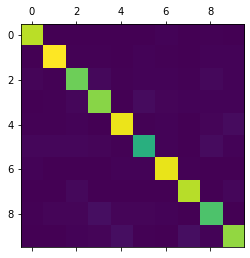

In [19]:
y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))

# simple confusion matrix plot for test set:)
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(y_test, y_pred))

In [30]:
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob[:10], y_pred[:10]

(array([[6.00547592e-09, 4.66240586e+00, 8.67927197e+01, 2.26583637e-01,
         2.38082508e-09, 2.74540064e-02, 2.66604919e-07, 2.42422234e-10,
         8.29083449e+00, 2.04143569e-06],
        [8.81777151e-01, 8.60550162e-05, 2.05789004e+01, 5.51964695e+01,
         7.32682749e-03, 8.92649638e+00, 4.95961427e-05, 4.82631950e+00,
         2.14831581e+00, 7.43425882e+00],
        [2.37755418e-05, 7.15692567e-05, 6.30524030e-02, 2.55211879e+01,
         1.16588986e-01, 6.76120695e-02, 2.18626624e-07, 2.51012824e+01,
         1.08235938e-01, 4.90219447e+01],
        [2.49555797e-08, 1.75051099e+00, 6.65952055e-03, 9.27131390e-01,
         6.11349717e+00, 1.84830915e-02, 2.06428267e-07, 8.99700572e+01,
         6.44191914e-02, 1.14924121e+00],
        [1.51537610e-05, 3.45427059e-04, 4.43431292e-02, 1.35112619e+00,
         1.50203428e-04, 5.10172847e-01, 4.85614499e-04, 5.95826521e-04,
         9.69054871e+01, 1.18727846e+00],
        [5.67563034e-09, 3.74152878e-04, 9.69919420e-02, 9.9

In [20]:
Z = test_data.iloc[:, :].values
print(Z.max())
Z = Z / 255.
Z.max()

255


1.0

In [21]:
Z.shape

(28000, 784)

In [22]:
y_pred_test_data = log_reg.predict(Z)
y_pred_test_data.shape

(28000,)

In [23]:
y_pred_test_data

array([2, 0, 9, ..., 3, 9, 2])

In [24]:
submission = pd.DataFrame({'ImageId':range(1, len(y_pred_test_data)+1),'Label':y_pred_test_data})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,7
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [25]:
filename = 'Image_Predictions1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Image_Predictions1.csv
